In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

cf=pd.read_csv('Churn.csv')

In [2]:
cf.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
cf.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
for i in cf.columns:
    print(f"Unique{i}'s count : {cf[i].nunique()}")
    print(f"{cf[i].unique()}")

UniquecustomerID's count : 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Uniquegender's count : 2
['Female' 'Male']
UniqueSeniorCitizen's count : 2
[0 1]
UniquePartner's count : 2
['Yes' 'No']
UniqueDependents's count : 2
['No' 'Yes']
Uniquetenure's count : 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
UniquePhoneService's count : 2
['No' 'Yes']
UniqueMultipleLines's count : 3
['No phone service' 'No' 'Yes']
UniqueInternetService's count : 3
['DSL' 'Fiber optic' 'No']
UniqueOnlineSecurity's count : 3
['No' 'Yes' 'No internet service']
UniqueOnlineBackup's count : 3
['Yes' 'No' 'No internet service']
UniqueDeviceProtection's count : 3
['No' 'Yes' 'No internet service']
UniqueTechSupport's count : 3
['No' 'Yes' 'No internet service']
UniqueStreamingTV's count : 3
['N

In [6]:
cf['TotalCharges']=pd.to_numeric(cf['TotalCharges'],errors='coerce')

def feature_to_float(feature_list,c):
    for i in feature_list:
        cf[i] = cf[i].astype(float)
    return cf
feature_to_float(['tenure'],cf)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
payment_column={'Electronic check': 'E-check', 'Mailed Check': 'Mailed Check', 'Bank transfer(automtic)':'Bank Transfer', 'Credit card(automatic)': 'Credit Card'}
cf["PaymentMethod"].replace(payment_column, inplace=True)

In [8]:
cf.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
cf.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
plt.style.use("fivethirtyeight")

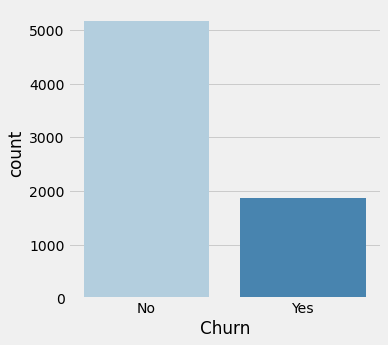

In [12]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=cf['Churn'],palette="Blues",linewidth=1)
plt.show()

In [13]:
plots={1:[111],2:[121,122],3:[131,132,133],4:[221,222,223,224],5:[231,232,233,234,235],6:[231,232,233,234,235,236]}

def boxplot(x,y,cf):
    
    rows=int(str(plots[len(y)][0])[0])
    columns=int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns,7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax=sns.boxplot(x=x,y=j,data=cf[[x,j]],palette='Blues',linewidth=1)
        ax.set_title(j)
    return plt.show()

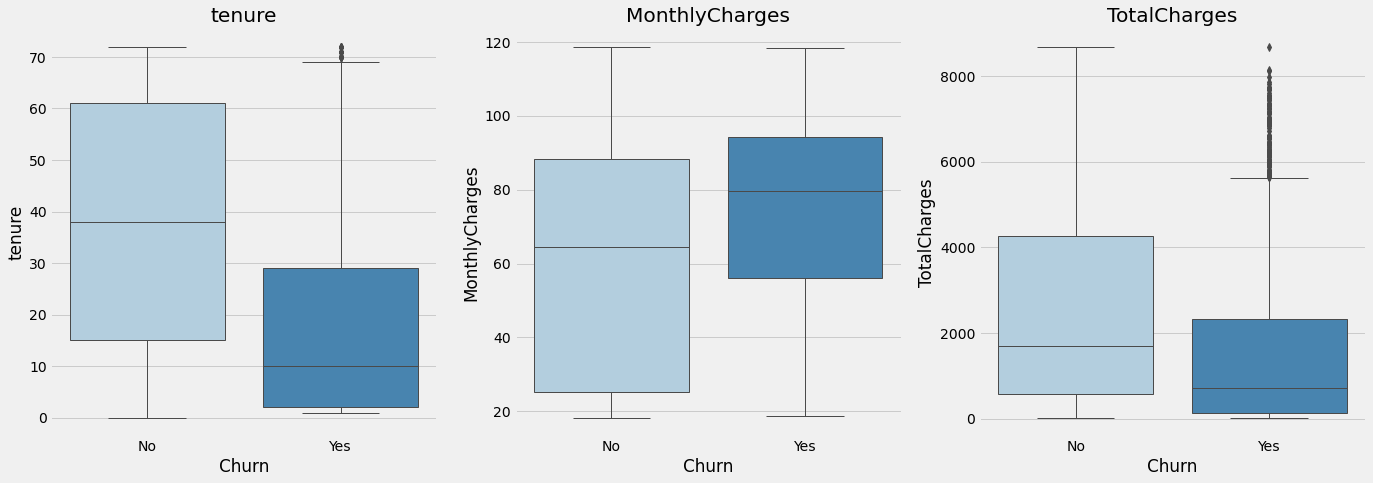

In [14]:
boxplot("Churn",["tenure", "MonthlyCharges", "TotalCharges"],cf)

In [15]:
def countplot(x,y,cf):
    
    rows=int(str(plots[len(y)][0])[0])
    columns=int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns,7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax=sns.countplot(x=j,hue=x,data=cf,palette='Blues',alpha=0.8,linewidth=0.4,edgecolor='black')
        ax.set_title(j)
    return plt.show()

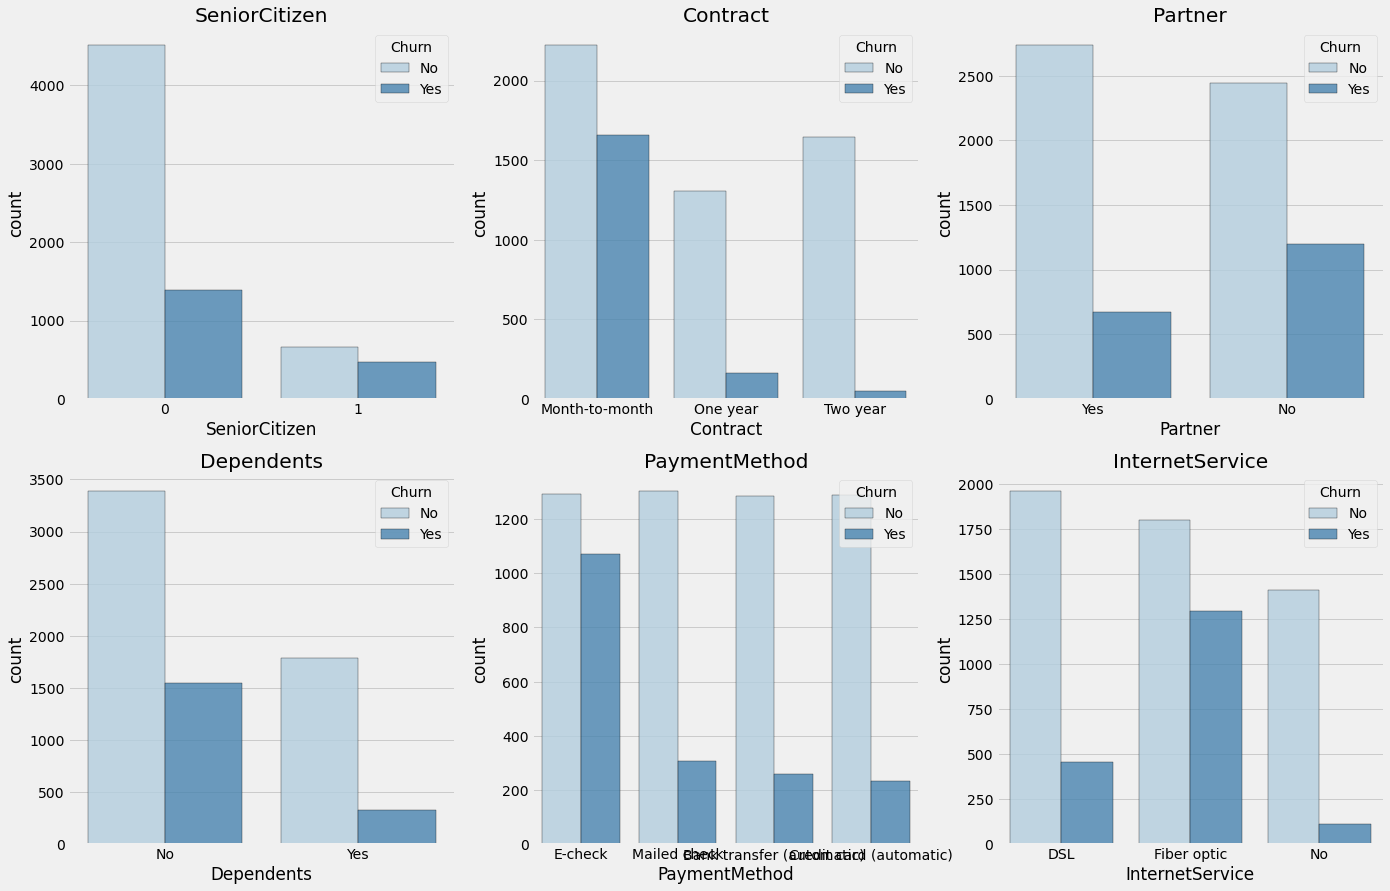

In [16]:
countplot("Churn",['SeniorCitizen','Contract','Partner','Dependents','PaymentMethod','InternetService'],cf)

In [17]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
cf_num = cf[numerical_features]
cf_num.describe()

Q1 = cf_num.quantile(0.25)
Q3 = cf_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((cf_num<(Q1 - 1.5 * IQR))| (cf_num>(Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [18]:
cf = cf.dropna()

In [19]:
cf = cf.drop(columns = "customerID")

In [20]:
cf['Number_AdditionalServices']=(cf[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']]=='Yes').sum(axis=1)

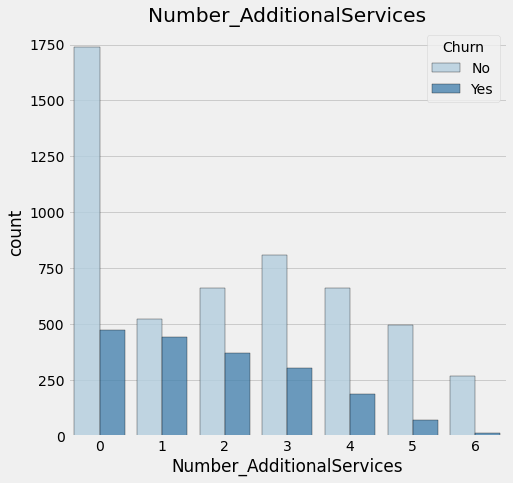

In [21]:
countplot('Churn',['Number_AdditionalServices'],cf)

In [22]:
features_le = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, cf):
    for i in features:
        cf[i] = cf[i].map({'Yes' : 1, 'No' : 0})
    return

label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], cf)

cf['gender'] = cf['gender'].map({'Female':1, 'Male':0})

In [23]:
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

cf = pd.get_dummies(cf, columns=features_ohe)

In [24]:
from sklearn.preprocessing import MinMaxScaler


features_mns = ['tenure', 'MonthlyCharges', 'TotalCharges']
cf_features_mns = pd.DataFrame(cf, columns = features_mns)
cf_remaining_features = cf.drop(columns = features_mns)

mns = MinMaxScaler()
rescaled_features = mns.fit_transform(cf_features_mns)

cf_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mns, index=cf_remaining_features.index)

cf = pd.concat([cf_remaining_features, cf_rescaled_features], axis=1)

<AxesSubplot:>

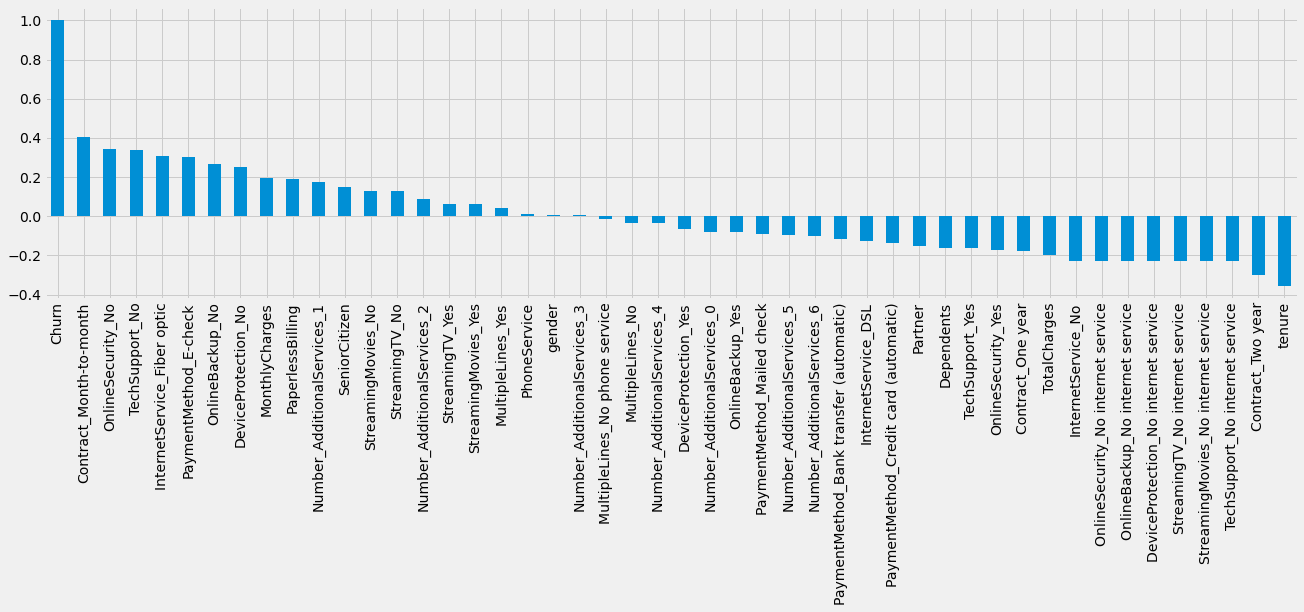

In [25]:
plt.figure(figsize=(16,10))
cf.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

In [26]:
from sklearn.model_selection import train_test_split

X1 = cf.drop('Churn', axis=1)
X = X1.values
y= cf['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

In [72]:
def feature_weights(X_cf, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_cf.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    top_weights_selected.plot(kind="bar")
    
    return print("")

In [73]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax=plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
    
    fig, ax=plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix(norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [74]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label= f'{classifier_name}')
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.title(f'{classifier_name}-ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test,y_pred_prob)}\n')

In [75]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label= f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name}-Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall,precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score(PR) : {auc_score_result}\n')

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

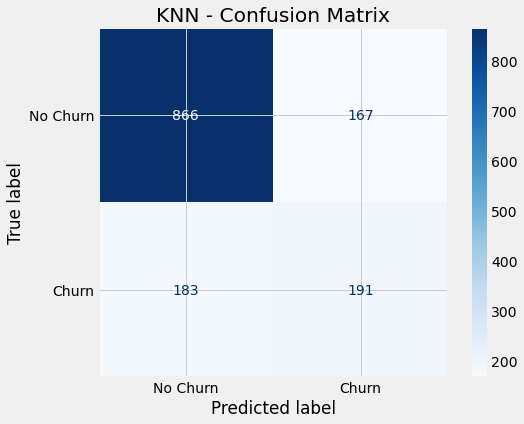

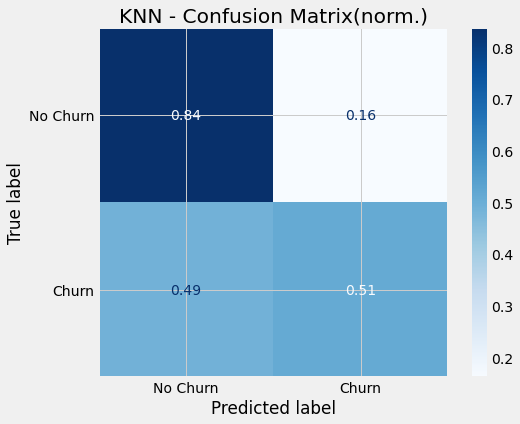

Accuracy Score Test: 0.7512437810945274
Accuracy Score Train: 0.8407111111111111 (as comparison)



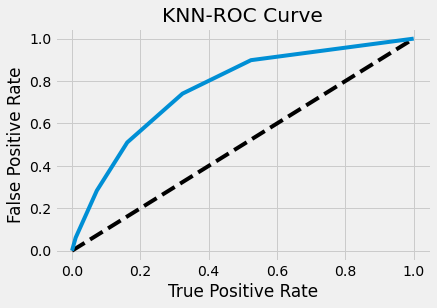

AUC Score (ROC): 0.7638310098306682



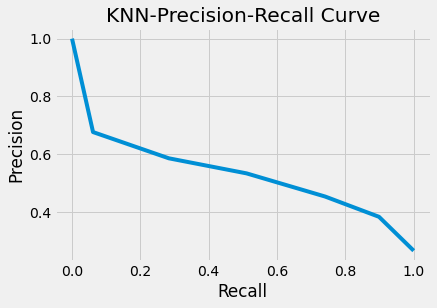

F1 Score: 0.5218579234972678 
AUC Score(PR) : 0.5311830797176768



In [44]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

In [76]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [79]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

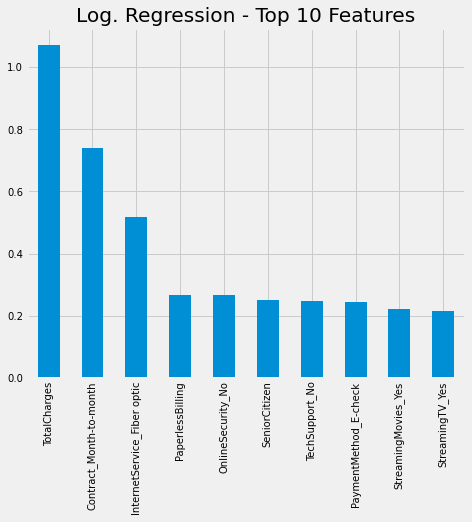

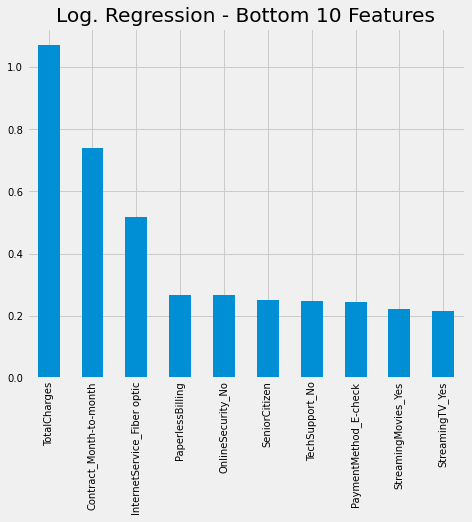

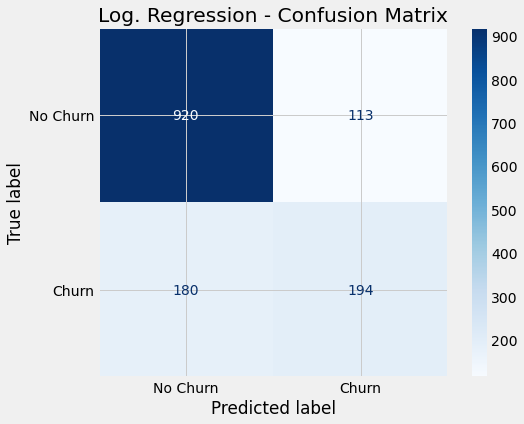

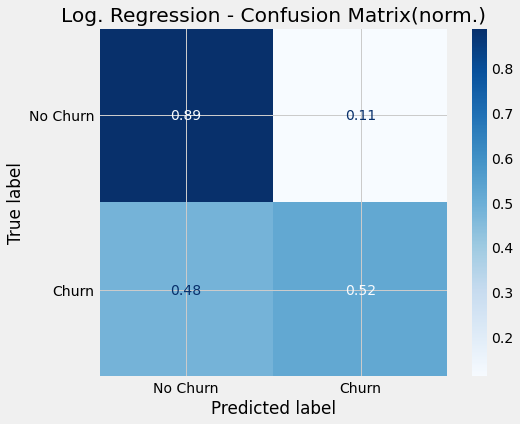

Accuracy Score Test: 0.7917555081734187
Accuracy Score Train: 0.8074666666666667 (as comparison)



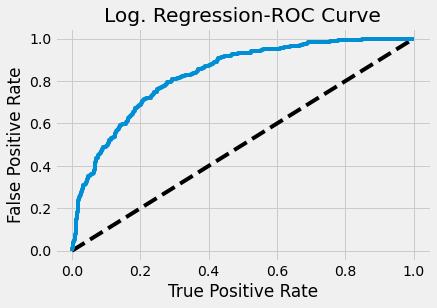

AUC Score (ROC): 0.8318432891065429



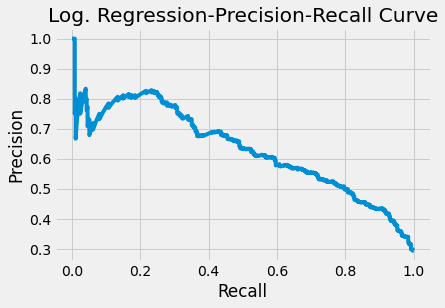

F1 Score: 0.5697503671071952 
AUC Score(PR) : 0.6302861536245499



In [80]:
feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

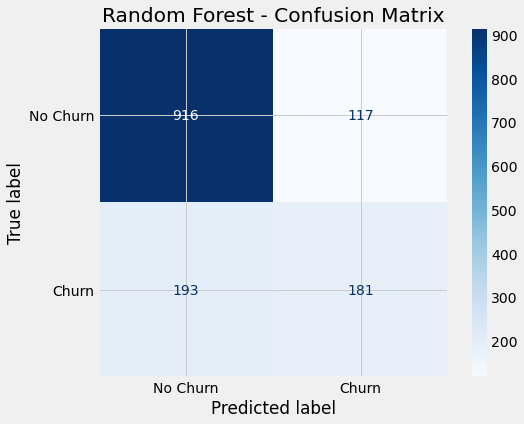

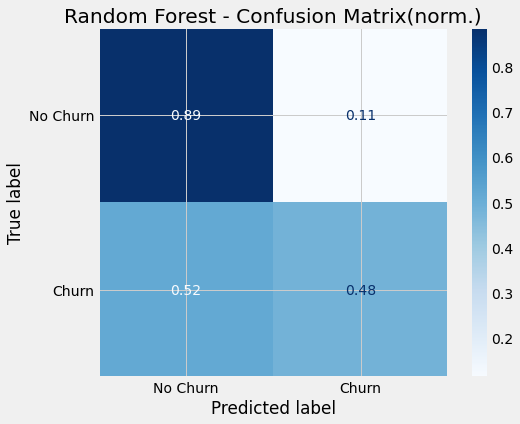

Accuracy Score Test: 0.7796730632551528
Accuracy Score Train: 0.9976888888888888 (as comparison)



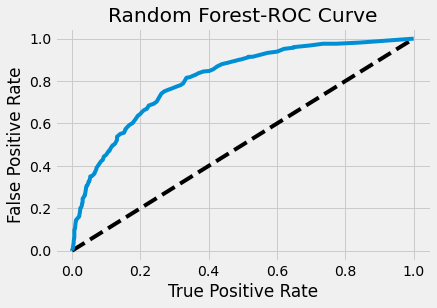

AUC Score (ROC): 0.8093645008826376



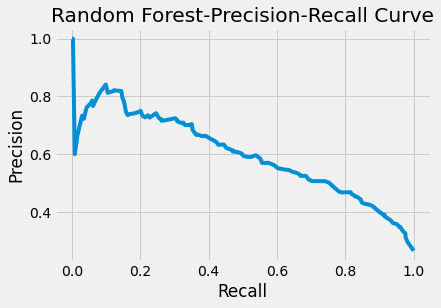

F1 Score: 0.5386904761904762 
AUC Score(PR) : 0.598303699611541



In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

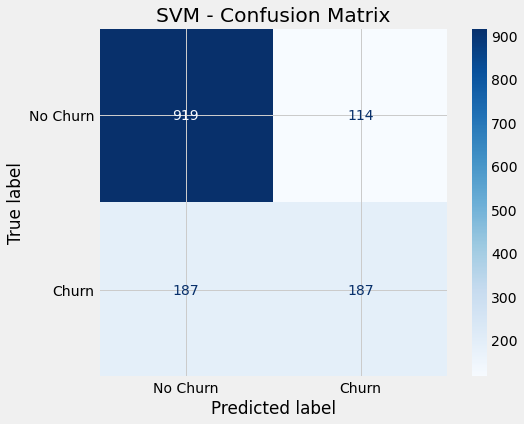

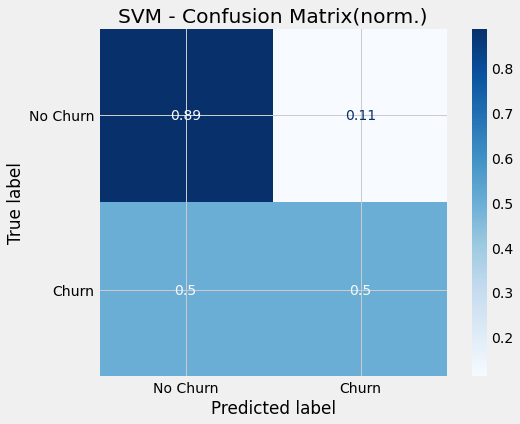

Accuracy Score Test: 0.7860696517412935
Accuracy Score Train: 0.8190222222222222 (as comparison)



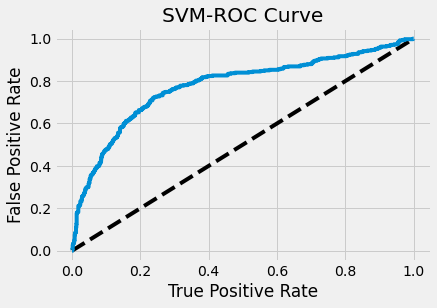

AUC Score (ROC): 0.7763251212656144



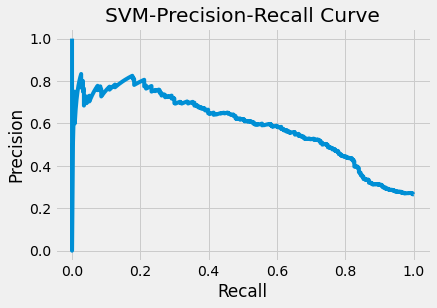

F1 Score: 0.554074074074074 
AUC Score(PR) : 0.5888443325466544



In [83]:
from sklearn.svm import SVC

support_vector_m = SVC(kernel = 'rbf', probability = True)
support_vector_m.fit(X_train, y_train)

y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')